In [15]:
from core.preprocessing import DataManager, retrend_data
from core.arima_models import SumToSumARIMA
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
from time import time

In [3]:
dm = DataManager()
dm.load_all_and_split(reindex=True)

In [4]:
prob = SumToSumARIMA(dm.detrended_train)

In [5]:
ti = time()
prob.train(order=(30,0,0))
tf = time()
print('training took {:1f} seconds'.format(tf - ti))

training took 17.619250 seconds


In [6]:
ti = time()
prob.test(dm.detrended_dev['total_power'])
tf = time()
print('testing took {:1f} seconds'.format(tf - ti))

testing took 94.072542 seconds


(24815548.75, 24821366.25)

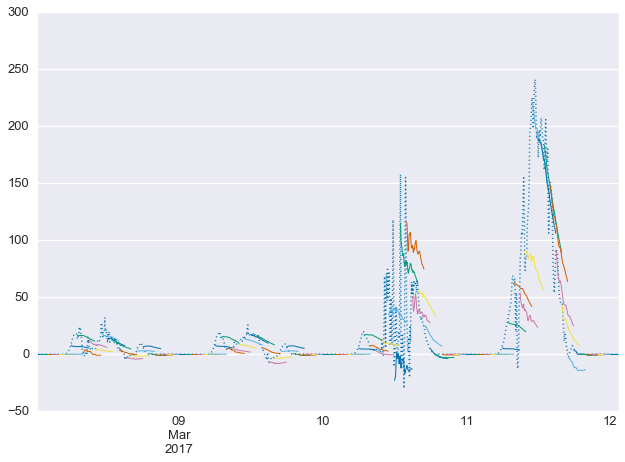

In [7]:
prob.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_xlim(start, end)

Transform back to Power from devation from clear sky.

In [8]:
# Add the forecasts to the DataManager class
dm.add_forecasts(prob.forecasts)
# Use data manager class to change all indices back to "real time"
dm.swap_index()

In [9]:
# With the forecasts in "real time" the default retrending function may be used
transformed_forecasts = [retrend_data(f) for f in dm.forecasts]

In [12]:
# Translate back to "sequential time" for plotting
dm.add_forecasts(transformed_forecasts)
dm.swap_index()

(24815518.75, 24821276.25)

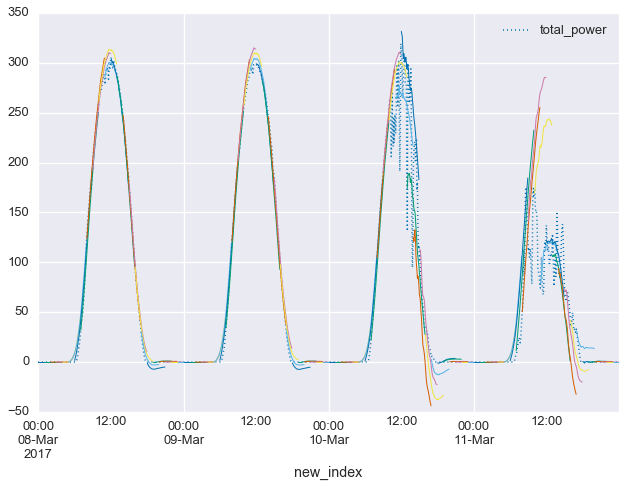

In [13]:
plot_forecasts(dm.original_dev, dm.forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [14]:
calc_test_mse(dm.original_dev, dm.forecasts)

1227.531909016042